# Data Analysis of Taxi Trip in NYC 

We have the data set from Kaggle that provides the data of New York City Cab Service in 2018. Let us analyze the data to arrive at the interesting conclusions which can be further used to increase the revenue of the Cab Service. This data set has data of 3 vendors in the year of 2018 at New York City. Vendor 1 and Vendor 2 are already having a huge market share of cab service in NYC. Vendor 4 has just started his business and hasn't seen much growth since the start of his business. In this analysis, I will analyze the data set and try to figure out ways in which the vendor 4 can actually grow and go on to compete with the other two well-known brands. 

## Downloading the Dataset and Data Pre-processing

The data set is downloaded from the following link
https://www.kaggle.com/datasets/neilclack/nyc-taxi-trip-data-google-public-data

Let us import the required libraries required for data visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset. Since I have already imported the files into binder, I am using pandas library to read the csv file. We have 2 files taxi_trip_data and taxi_zone_geo which contains cab service data and location data respectively. 

In [3]:
taxi_df = pd.read_csv('taxi_trip_data.csv')
taxi_location_df = pd.read_csv('taxi_zone_geo.csv')

In [4]:
taxi_df              #(1081676, 17)
taxi_location_df    #(263,4)

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
...,...,...,...,...
258,206,Saint George/New Brighton,Staten Island,"POLYGON((-74.0825658580711 40.6483158193535, -..."
259,214,South Beach/Dongan Hills,Staten Island,"POLYGON((-74.085787808 40.5958840799999, -74.0..."
260,221,Stapleton,Staten Island,"POLYGON((-74.076017768 40.6377481049999, -74.0..."
261,245,West Brighton,Staten Island,"POLYGON((-74.0992883379999 40.640204723, -74.0..."


## Data Preparation and Cleaning

Since not all data is accurate and a lot of garbage data and unusable data is also available in the csv file, we have to clean the data and have only the usable data or the data required for visualization in our data frames.

The dataset has been downloaded and extracted. Let us look at the type of data they have and check whether or not we have to do formatting of data.

In [5]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1081676 entries, 0 to 1081675

Data columns (total 17 columns):

 #   Column               Non-Null Count    Dtype  

---  ------               --------------    -----  

 0   vendor_id            1081676 non-null  int64  

 1   pickup_datetime      1081676 non-null  object 

 2   dropoff_datetime     1081675 non-null  object 

 3   passenger_count      1081675 non-null  float64

 4   trip_distance        1081675 non-null  float64

 5   rate_code            1081675 non-null  float64

 6   store_and_fwd_flag   1081675 non-null  object 

 7   payment_type         1081675 non-null  float64

 8   fare_amount          1081675 non-null  float64

 9   extra                1081675 non-null  float64

 10  mta_tax              1081675 non-null  float64

 11  tip_amount           1081675 non-null  float64

 12  tolls_amount         1081675 non-null  float64

 13  imp_surcharge        1081675 non-null  float64

 14  total_amount         1081675 no

We can see that the pickup time and drop time are of the type object. I have to convert them into datetime format and I am also going to seperate date and time in those two columns so that I can use them for visualization.

In [6]:
#seperating date and time from pickupdatetime and dropoffdatetime initializing them into new columns 
taxi_df['pickup_date'] = pd.to_datetime(taxi_df['pickup_datetime'], errors='coerce').dt.date
taxi_df['pickup_time'] = pd.to_datetime(taxi_df['pickup_datetime'], errors='coerce').dt.time
taxi_df['dropoff_date'] = pd.to_datetime(taxi_df['dropoff_datetime'], errors='coerce').dt.date
taxi_df['dropoff_time'] = pd.to_datetime(taxi_df['dropoff_datetime'], errors='coerce').dt.time

taxi_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1.0,18.15,3.0,N,1.0,70.0,0.0,...,16.16,10.50,0.3,96.96,161.0,1.0,2018-03-29,13:37:13,2018-03-29,14:17:01
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1.0,4.59,1.0,N,1.0,25.0,0.0,...,5.16,0.00,0.3,30.96,13.0,230.0,2018-03-29,13:37:18,2018-03-29,14:15:33
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1.0,0.30,1.0,N,1.0,3.0,0.0,...,0.76,0.00,0.3,4.56,231.0,231.0,2018-03-29,13:26:57,2018-03-29,13:28:03
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2.0,16.97,1.0,N,1.0,49.5,0.0,...,5.61,5.76,0.3,61.67,231.0,138.0,2018-03-29,13:07:48,2018-03-29,14:03:05
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5.0,14.45,1.0,N,1.0,45.5,0.0,...,10.41,5.76,0.3,62.47,87.0,138.0,2018-03-29,14:19:11,2018-03-29,15:19:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081671,2,2018-04-03 18:16:26,2018-04-03 18:46:05,1.0,4.78,1.0,N,1.0,21.5,1.0,...,6.99,0.00,0.3,30.29,24.0,246.0,2018-04-03,18:16:26,2018-04-03,18:46:05
1081672,2,2018-04-03 18:52:04,2018-04-03 19:26:07,1.0,6.08,1.0,N,1.0,24.0,1.0,...,7.74,0.00,0.3,33.54,211.0,238.0,2018-04-03,18:52:04,2018-04-03,19:26:07
1081673,2,2018-04-03 19:09:11,2018-04-03 19:51:49,1.0,15.06,1.0,N,1.0,44.5,1.0,...,9.26,0.00,0.3,55.56,132.0,179.0,2018-04-03,19:09:11,2018-04-03,19:51:49
1081674,2,2018-01-06 00:34:39,2018-01-06 00:49:56,1.0,8.68,1.0,N,1.0,24.5,0.5,...,6.31,5.76,0.3,37.87,138.0,262.0,2018-01-06,00:34:39,2018-01-06,00:49:56


Thus, I have converted the date time column into two seperate columns having date and time as their object types. 
Since I don't need the columns rate_code, store_and_fwd_flag, payment_type, extra, mta_tax, tolls_amount, imp_surcharge, I am dropping these columns.

In [7]:
taxi_df.drop(['rate_code', 'store_and_fwd_flag', 'payment_type', 'extra', 'mta_tax', 'tolls_amount', 'imp_surcharge'], axis =1, inplace=True)
taxi_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,pickup_location_id,dropoff_location_id,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1.0,18.15,70.0,16.16,96.96,161.0,1.0,2018-03-29,13:37:13,2018-03-29,14:17:01
1,2,2018-03-29 13:37:18,2018-03-29 14:15:33,1.0,4.59,25.0,5.16,30.96,13.0,230.0,2018-03-29,13:37:18,2018-03-29,14:15:33
2,2,2018-03-29 13:26:57,2018-03-29 13:28:03,1.0,0.30,3.0,0.76,4.56,231.0,231.0,2018-03-29,13:26:57,2018-03-29,13:28:03
3,2,2018-03-29 13:07:48,2018-03-29 14:03:05,2.0,16.97,49.5,5.61,61.67,231.0,138.0,2018-03-29,13:07:48,2018-03-29,14:03:05
4,2,2018-03-29 14:19:11,2018-03-29 15:19:59,5.0,14.45,45.5,10.41,62.47,87.0,138.0,2018-03-29,14:19:11,2018-03-29,15:19:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1081671,2,2018-04-03 18:16:26,2018-04-03 18:46:05,1.0,4.78,21.5,6.99,30.29,24.0,246.0,2018-04-03,18:16:26,2018-04-03,18:46:05
1081672,2,2018-04-03 18:52:04,2018-04-03 19:26:07,1.0,6.08,24.0,7.74,33.54,211.0,238.0,2018-04-03,18:52:04,2018-04-03,19:26:07
1081673,2,2018-04-03 19:09:11,2018-04-03 19:51:49,1.0,15.06,44.5,9.26,55.56,132.0,179.0,2018-04-03,19:09:11,2018-04-03,19:51:49
1081674,2,2018-01-06 00:34:39,2018-01-06 00:49:56,1.0,8.68,24.5,6.31,37.87,138.0,262.0,2018-01-06,00:34:39,2018-01-06,00:49:56


Now, it's time to clean the taxi_location_df.

In [8]:
taxi_location_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 263 entries, 0 to 262

Data columns (total 4 columns):

 #   Column     Non-Null Count  Dtype 

---  ------     --------------  ----- 

 0   zone_id    263 non-null    int64 

 1   zone_name  263 non-null    object

 2   borough    263 non-null    object

 3   zone_geom  263 non-null    object

dtypes: int64(1), object(3)

memory usage: 8.3+ KB


Since I don't need zone_geom, I'll drop off that column.

In [9]:
taxi_location_df.drop('zone_geom', axis = 1, inplace = True)
taxi_location_df

,zone_id,zone_name,borough
0,1,Newark Airport,EWR
1,3,Allerton/Pelham Gardens,Bronx
2,18,Bedford Park,Bronx
3,20,Belmont,Bronx
4,31,Bronx Park,Bronx
...,...,...,...
258,206,Saint George/New Brighton,Staten Island
259,214,South Beach/Dongan Hills,Staten Island
260,221,Stapleton,Staten Island
261,245,West Brighton,Staten Island


Now, most of the data is cleaned. I will merge both the dataframes into a single data frame so that it would be easy for me to go through with the process. For that, I will have to create a new columns which match the column names of the taxi_df. I will create two new dfs so that I will be able to map the pickoff location and dropoff location as well.

In [10]:
pickup_df = taxi_location_df.copy()

#Renaming columns in pickup_df
pickup_df.columns = ['pickup_location_id', 'pickup_zone_name','pickup_borough']

dropoff_df = taxi_location_df.copy()

#Renaming columns in pickup_df
dropoff_df.columns = ['dropoff_location_id', 'dropoff_zone_name','dropoff_borough']

pickup_df, dropoff_df

(     pickup_location_id           pickup_zone_name pickup_borough
 0                     1             Newark Airport            EWR
 1                     3    Allerton/Pelham Gardens          Bronx
 2                    18               Bedford Park          Bronx
 3                    20                    Belmont          Bronx
 4                    31                 Bronx Park          Bronx
 ..                  ...                        ...            ...
 258                 206  Saint George/New Brighton  Staten Island
 259                 214   South Beach/Dongan Hills  Staten Island
 260                 221                  Stapleton  Staten Island
 261                 245              West Brighton  Staten Island
 262                 251                Westerleigh  Staten Island
 
 [263 rows x 3 columns],
      dropoff_location_id          dropoff_zone_name dropoff_borough
 0                      1             Newark Airport             EWR
 1                      3    Al

Now, as we have checked all the required conditions for inner join, we can merge the three data frames.

In [11]:
intermediate_df = taxi_df.merge(pickup_df, how = 'inner', on = 'pickup_location_id')
final_df = intermediate_df.merge(dropoff_df, how= 'inner', on='dropoff_location_id')

intermediate_df, final_df

(         vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
 0                2  2018-03-29 13:37:13  2018-03-29 14:17:01              1.0   
 1                2  2018-03-29 16:59:02  2018-03-29 17:51:12              1.0   
 2                2  2018-05-08 22:53:36  2018-05-08 23:22:46              1.0   
 3                2  2018-05-08 22:33:07  2018-05-08 23:17:08              4.0   
 4                2  2018-05-09 08:55:29  2018-05-09 09:29:57              1.0   
 ...            ...                  ...                  ...              ...   
 1058350          1  2018-04-11 23:42:43  2018-04-11 23:43:12              1.0   
 1058351          1  2018-04-15 02:21:58  2018-04-15 02:22:18              4.0   
 1058352          2  2018-09-21 12:40:04  2018-09-21 14:03:43              1.0   
 1058353          1  2018-09-05 13:27:27  2018-09-05 13:56:19              1.0   
 1058354          2  2018-09-27 10:34:06  2018-09-27 11:41:33              1.0   
 
          trip

Now, we have a single data frame in which all the required data is available. 

Let us save and upload our work to Jovian before continuing.

In [12]:
project_name = "nyc-taxi-trip-data-analysis" # change this (use lowercase letters and hyphens only)

In [13]:
!pip install jovian --upgrade -q

In [14]:
import jovian

In [15]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepakvinayagam1199/nyc-taxi-trip-data-analysis" on https://jovian.ai

[jovian] Committed successfully! https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis


'https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis'

In [16]:
final_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,fare_amount,tip_amount,total_amount,pickup_location_id,dropoff_location_id,pickup_date,pickup_time,dropoff_date,dropoff_time,pickup_zone_name,pickup_borough,dropoff_zone_name,dropoff_borough
0,2,2018-03-29 13:37:13,2018-03-29 14:17:01,1.0,18.15,70.0,16.16,96.96,161.0,1.0,2018-03-29,13:37:13,2018-03-29,14:17:01,Midtown Center,Manhattan,Newark Airport,EWR
1,2,2018-07-13 07:11:20,2018-07-13 07:46:11,1.0,20.21,71.5,17.86,107.16,161.0,1.0,2018-07-13,07:11:20,2018-07-13,07:46:11,Midtown Center,Manhattan,Newark Airport,EWR
2,2,2018-03-22 14:24:31,2018-03-22 15:08:38,1.0,18.28,71.0,10.00,91.80,161.0,1.0,2018-03-22,14:24:31,2018-03-22,15:08:38,Midtown Center,Manhattan,Newark Airport,EWR
3,2,2018-06-20 17:00:33,2018-06-20 18:02:18,1.0,19.61,81.0,10.00,104.80,161.0,1.0,2018-06-20,17:00:33,2018-06-20,18:02:18,Midtown Center,Manhattan,Newark Airport,EWR
4,2,2018-02-21 07:50:27,2018-02-21 08:37:30,1.0,17.28,70.0,10.00,92.80,161.0,1.0,2018-02-21,07:50:27,2018-02-21,08:37:30,Midtown Center,Manhattan,Newark Airport,EWR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041528,1,2018-05-27 11:15:18,2018-05-27 11:15:20,1.0,0.00,2.5,0.00,3.30,184.0,184.0,2018-05-27,11:15:18,2018-05-27,11:15:20,Pelham Bay Park,Bronx,Pelham Bay Park,Bronx
1041529,2,2018-06-15 18:05:44,2018-06-15 18:38:45,1.0,4.87,25.0,5.36,32.16,249.0,2.0,2018-06-15,18:05:44,2018-06-15,18:38:45,West Village,Manhattan,Jamaica Bay,Queens
1041530,1,2018-04-19 13:09:45,2018-04-19 13:09:48,1.0,0.00,2.5,0.00,3.30,2.0,2.0,2018-04-19,13:09:45,2018-04-19,13:09:48,Jamaica Bay,Queens,Jamaica Bay,Queens
1041531,1,2018-11-20 12:42:58,2018-11-20 13:56:47,1.0,19.00,63.5,10.00,91.58,234.0,110.0,2018-11-20,12:42:58,2018-11-20,13:56:47,Union Sq,Manhattan,Great Kills Park,Staten Island


## Exploratory Analysis and Visualization

Now since the data is ready, let us plot some graphs and visualize the data and figure out ways in which vendor 4 can grow and can gain a competitive advantage over the other two vendors.

Let us draw a pie chart on revenue made by these three vendors so that we can be clear about the market share of cab service in NYC in 2018.

In [17]:
vendor_revenue = final_df.groupby('vendor_id')['fare_amount'].sum()
vendor_revenue

vendor_id
1    12352613.43
2    19594642.82
4      146870.18
Name: fare_amount, dtype: float64

Let us plot a pie chart using the data that we have.

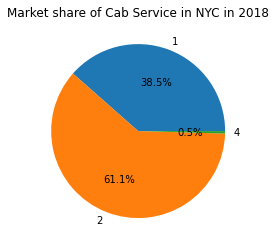

In [18]:
plt.pie(vendor_revenue, labels= vendor_revenue.index, autopct='%1.1f%%');
plt.title('Market share of Cab Service in NYC in 2018');

As we can see, the 1st and the 2nd vendor duopolized the cab market and 4th vendor only has 0.5% of market share. This also means that the vendor 4 must price his services competitively wen compared with the other two vendors in order to gain market share next year. It is very tough for a company to enter into a business which in monopolised by one or two companies together. The new company should have a moat and they should leverage it to its maximum potential in order to survive in the market. 

And when already two well known brands are in the market, people tend to go for the services of a well-known brand and in order for them to consider a new brand, the stakeholders of the company should make sure to build trust among people and show that the new brand is better in some aspects when compared with the existing companies. 

The company should perform market research surveys in order to understand the pain points of the customers who use cab services regularly and solve that issue by incorporating a solution in their cab service and promoting the brand by offering a solution for the major problem as their unique selling point. This may help the vendor 4 to gain trust and more customers. 

Let us draw a histogram to find the distribution of trip distance. This data will help us to know what is the mean distance for which people are taking cabs.

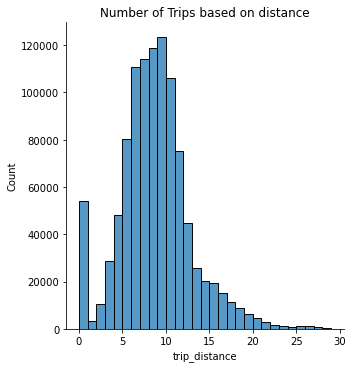

In [19]:
sns.displot(final_df.trip_distance, bins = np.arange(0,30,1));
plt.title('Number of Trips based on distance');

Most of the trips are towards the mean value of 10. This is the perfect example of normal distribution. Even in the future, this will follow a normal distribution. 

What vendor 4 can do? -> Vendor 4 can give a small discount on the trips having the mean distance can win over the other vendors. Not only this will help him retain his old customers, but also to gain new customers. Since the most of the trips are booked for the distance of 10 km, people who travel that distance will have to choose vendor 4 since the fare is lesser when compared to the other two. 

Let us see the average tips based on location by using a bar chart. This data will help us to analyze in which place the cab drivers earn the most on tips.

In [20]:
tip_df = final_df.copy()[['pickup_zone_name','tip_amount']]
tip_df = tip_df[['pickup_zone_name','tip_amount']].groupby('pickup_zone_name').mean().sort_values(by='tip_amount',ascending=False).head(10)
tip_df

,tip_amount
pickup_zone_name,
Great Kills,37.116667
Westerleigh,36.000000
Grymes Hill/Clifton,25.860000
Newark Airport,16.846750
Van Cortlandt Park,15.573333
West Brighton,12.830000
South Beach/Dongan Hills,11.736667
New Dorp/Midland Beach,10.490000
Hammels/Arverne,8.902069


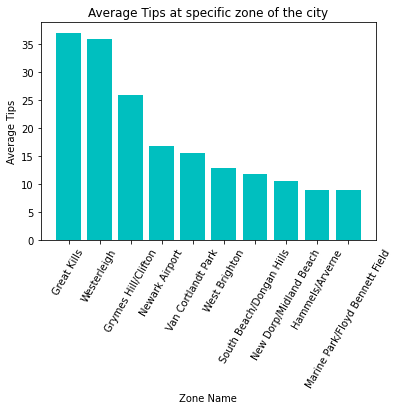

In [21]:
plt.bar(tip_df.index,tip_df.tip_amount, color = 'c', );
plt.xlabel('Zone Name');
plt.ylabel('Average Tips');
plt.xticks(rotation=60)
plt.title('Average Tips at specific zone of the city');

We can see that average tips is maximum at Great Kills followed by Westerleigh and Grymes Hill. 

This data tells us that people in these region tend to spend more on cabs if the services are good. Vendor 4 can set up his business in those places and by offering excellent service, he can gain trust among the people of those region.

In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepakvinayagam1199/nyc-taxi-trip-data-analysis" on https://jovian.ai

[jovian] Committed successfully! https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis


'https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis'

## Asking and Answering Questions

Now, let us make use of some charts to answer some of the interesting insights that vendor 4 must know in order to prevail in the market.

#### Q1: At what time of the day does the most of the trips are booked?

In [28]:
trips_df = final_df.copy()[['pickup_datetime','dropoff_location_id']]
trips_df ['hour'] = pd.to_datetime(trips_df['pickup_datetime']).dt.hour
trips_df

,pickup_datetime,dropoff_location_id,hour
0,2018-03-29 13:37:13,1.0,13
1,2018-07-13 07:11:20,1.0,7
2,2018-03-22 14:24:31,1.0,14
3,2018-06-20 17:00:33,1.0,17
4,2018-02-21 07:50:27,1.0,7
...,...,...,...
1041528,2018-05-27 11:15:18,184.0,11
1041529,2018-06-15 18:05:44,2.0,18
1041530,2018-04-19 13:09:45,2.0,13
1041531,2018-11-20 12:42:58,110.0,12


In [29]:
trips_df = trips_df[['hour','dropoff_location_id']].groupby('hour').count()
trips_df

,dropoff_location_id
hour,
0,37197
1,21583
2,13822
3,11633
4,12875
5,14036
6,21483
7,33310
8,43947


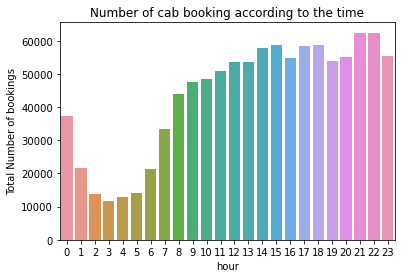

In [30]:
sns.barplot(x=trips_df.index, y=trips_df.dropoff_location_id);
plt.title('Number of cab booking according to the time');
plt.ylabel('Total Number of bookings');

The above chart shows that most no ofcabs are booked in the later part of the day and the least number of cabs are booked in the early part of the day.

What can Vendor 4 do? -> Vendor 4 can change the work timings of his employees to make the most of the late night demand of the cabs. And for whoever books the cab in the early morning, he can charge lesser owing to less demand and try to increase the number of cab bookings which will help him gain the market share.

#### Q2: What is the number of trips for each vendor every month in 2018?

In [22]:
line_df = final_df.copy()

#Here dropoff locationid is used to store the values of the count
line_df = line_df[['vendor_id','pickup_datetime','dropoff_location_id']]

line_df['month'] = pd.to_datetime(line_df['pickup_datetime']).dt.month

line_df = line_df[['vendor_id','month','dropoff_location_id']].groupby(['vendor_id','month']).count()

line_df = line_df.reset_index()

line_df

,vendor_id,month,dropoff_location_id
0,1,1,29640
1,1,2,29829
2,1,3,65555
3,1,4,34840
4,1,5,36235
5,1,6,33876
6,1,7,28042
7,1,8,25898
8,1,9,28332
9,1,10,33342


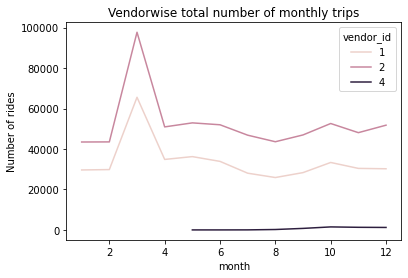

In [23]:
sns.lineplot(x=line_df.month, y=line_df.dropoff_location_id, hue = line_df.vendor_id)
plt.ylabel('Number of rides');
plt.title('Vendorwise total number of monthly trips');

This chart clearly shows that the cab bookings of Vendor 4 hasn't grown much ever since they started the business meanwhile both the other Vendors are clearly growing in sync. This might seem to be a worrysome sign for Vendor 4 but this chart only shows the growth in absolute terms. In percentage wise, vendor 4 has grown the most from 14 cab bookings in May to 1499 in October before falling to 1235 in December. This is such a small number to even consider this a growth since the other two vendors are way ahead of vendor 4. 

Vendor 4 must quickly ensure that they grow at a brisk pace. It is also notable that the demand for cabs peaked during the month of March.

#### Q3: At what time of the year most of the cabs are booked?

In [34]:
year_df = final_df.copy()[['pickup_datetime','dropoff_location_id']]
year_df ['month'] = pd.to_datetime(year_df['pickup_datetime']).dt.month
year_df

,pickup_datetime,dropoff_location_id,month
0,2018-03-29 13:37:13,1.0,3
1,2018-07-13 07:11:20,1.0,7
2,2018-03-22 14:24:31,1.0,3
3,2018-06-20 17:00:33,1.0,6
4,2018-02-21 07:50:27,1.0,2
...,...,...,...
1041528,2018-05-27 11:15:18,184.0,5
1041529,2018-06-15 18:05:44,2.0,6
1041530,2018-04-19 13:09:45,2.0,4
1041531,2018-11-20 12:42:58,110.0,11


In [35]:
year_df = year_df[['month','dropoff_location_id']].groupby('month').count()
year_df

,dropoff_location_id
month,
1,73093
2,73333
3,163242
4,85758
5,89154
6,85859
7,74903
8,69698
9,76042


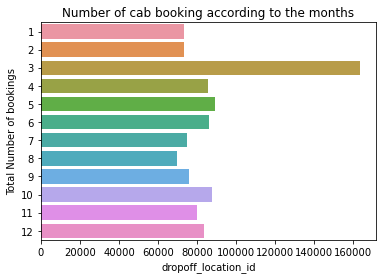

In [50]:
sns.barplot(y=year_df.index, x=year_df.dropoff_location_id, orient='h');
plt.title('Number of cab booking according to the months');
plt.ylabel('Total Number of bookings');

The above chart shows that the demand peaked in March before falling to the nominal range. Although one cannot assume from one year of data, that in every March the demand peaks, I can see that the demand peaks for both the other vendors too from the previous chart. I hereby conclude that March is a season for cabs .Vendor 4 can make use of this data and run a promotion on march or can sell a more premium service on march which includes daily picking up and dropping off customers or a 10% discount during march for people who subscribed to the premium service of vendor 4.

#### Q4: What place had the maximum booking of cabs in NYC during 2018?

In [24]:
borough_df = final_df.copy()

#Here dropoff locationid is used to store the values of the count
borough_df = borough_df[['vendor_id','pickup_borough','dropoff_location_id']]

borough_df = borough_df[['vendor_id','pickup_borough','dropoff_location_id']].groupby(['pickup_borough','vendor_id']).count()

borough_df = borough_df.reset_index()
borough_df

,pickup_borough,vendor_id,dropoff_location_id
0,Bronx,1,1017
1,Bronx,2,1508
2,Bronx,4,2
3,Brooklyn,1,8934
4,Brooklyn,2,13163
5,Brooklyn,4,73
6,EWR,1,273
7,EWR,2,365
8,EWR,4,2
9,Manhattan,1,267283


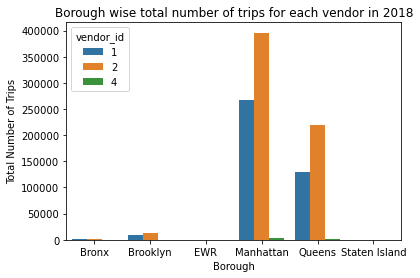

In [25]:
sns.barplot(x=borough_df.pickup_borough, y=borough_df.dropoff_location_id, hue=borough_df.vendor_id);
plt.title('Borough wise total number of trips for each vendor in 2018');
plt.xlabel('Borough');
plt.ylabel('Total Number of Trips');

The above bar chart shows that most of the bookings are based on Manhattan and Queens. Vendor 4 must shift his focus on these two regions than any other region. Vendor 4 must deploy most of his drivers to these locations and make sure he makes use of the demand in those areas in order to increase his market share and compete with the well established vendors.

It would also be good for vendor 4 not to focus on other regions as there isn't much demand in those regions and it would be a waste of resources and money and also it would be extremely hard to get a return on investment on those regions.

#### Q5: Which timeof the week the booking has been maximum?

In [40]:
week_df = final_df.copy()[['pickup_datetime','dropoff_location_id']]
week_df ['day_of_week'] = pd.to_datetime(week_df['pickup_datetime']).dt.dayofweek

#To sort the values based on their day of the week
week_df = week_df.sort_values(by='day_of_week', ascending=True)

#Converting dayoftheweek(integer) to dayname(string)
week_df['day'] = pd.to_datetime(week_df['pickup_datetime']).dt.day_name()

week_df ['hour'] = pd.to_datetime(week_df['pickup_datetime']).dt.hour
week_df

,pickup_datetime,dropoff_location_id,day_of_week,day,hour
520766,2018-11-26 21:21:22,41.0,0,Monday,21
132074,2018-03-12 07:28:21,138.0,0,Monday,7
132075,2018-07-02 06:48:33,138.0,0,Monday,6
703382,2018-03-26 12:34:59,125.0,0,Monday,12
351477,2018-01-22 22:05:58,33.0,0,Monday,22
...,...,...,...,...,...
943910,2018-04-22 21:04:32,164.0,6,Sunday,21
943911,2018-04-22 23:12:11,164.0,6,Sunday,23
667103,2018-10-28 13:15:36,234.0,6,Sunday,13
777401,2018-05-06 17:44:01,43.0,6,Sunday,17


In [41]:
week_df = week_df[['day','hour','dropoff_location_id']].groupby(['day','hour']).count()
week_df = week_df.reset_index()
week_df
week_df_pivot = week_df.pivot('day','hour','dropoff_location_id')
week_df_pivot

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Friday,6704,3403,1975,1453,1974,2354,3824,5361,7023,7752,...,9735,9544,8590,9512,9210,8175,8006,8663,9482,10237
Monday,3511,1748,1018,867,1591,2419,3520,5832,7717,7586,...,7547,7849,7398,7671,7552,6995,7625,8582,7899,5997
Saturday,8216,5397,3979,3243,2628,1699,2198,2523,3136,3663,...,6283,6538,6167,6890,7156,6855,5570,6016,7048,8094
Sunday,6802,5248,3704,3638,2838,1805,2091,2451,3007,3862,...,7458,7931,8028,7933,7797,6806,6359,6799,6418,5700
Thursday,4653,2229,1257,992,1419,2042,3581,5825,7979,8575,...,10056,9844,9170,9743,9838,9295,10032,11987,11949,10289
Tuesday,3553,1562,755,643,1122,1755,3067,5686,7636,8208,...,8366,8447,7718,8184,8351,7762,8642,10004,9442,6926
Wednesday,3758,1996,1134,797,1303,1962,3202,5632,7449,7860,...,8491,8550,7678,8474,8770,7893,8769,10250,10180,8127


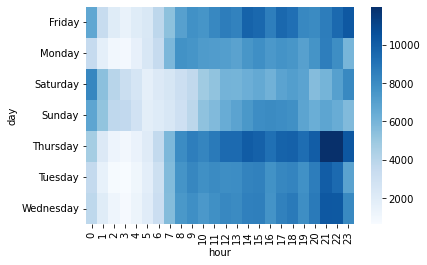

<Figure size 36000x36000 with 0 Axes>

In [42]:
sns.heatmap(week_df_pivot, annot=False, cmap='Blues');
plt.figure(figsize=(500,500));

The heat map shows that the demand is maximum at Thursday 21:00 hours to 22:00 hours. This means that people will spend more on cabs during this time as the cabs won't be available. Vendor 4 must increase the fare during this time so that he can maximize the demand during Thursday. 

While it might sound like counter-intuitive to increase the fare during the high demand times, people like to focus on the short term. Most of them would want to be home soon enough after a long tiring day of work and they won't mind paying more to get home sooner. This is why vendor 4 should increase his price during these hours.

It is true that I advise vendor 4 to give a discount during March which is also a high demand time, you should understand that March is a pretty long time range while this is a shorter time range. Increasing the fare over a longer time range would have negative effect on the company's revenue while on the shorter time range can do otherwise. 

Let us save and upload our work to Jovian before continuing.

In [43]:
import jovian

In [5]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepakvinayagam1199/nyc-taxi-trip-data-analysis" on https://jovian.ai

[jovian] Committed successfully! https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis


'https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis'

## Inferences and Conclusion

->People in NYC generally tend to book cabs to travel an average distance of 10 kms. 

->people tend to tip more for cabs in Great Kills, Westerleigh and Grymes Hill/Clifton when compared to other regions

->Cab bookings peak during March.

->Manhattan and Queens make up for the most of the cabs booked in 2018. 

->Most of the trips are booked during the middle of the night. 

->There are more people looking for cabs during thursday 9:00 to 10:00 PM.

In [45]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## References and Future Work

https://pandas.pydata.org/docs/
https://seaborn.pydata.org/tutorial.html
https://matplotlib.org/stable/index.html

In [1]:
import jovian

In [3]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "deepakvinayagam1199/nyc-taxi-trip-data-analysis" on https://jovian.ai

[jovian] Committed successfully! https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis


'https://jovian.ai/deepakvinayagam1199/nyc-taxi-trip-data-analysis'